# Artificial Intelligence Course - Fall 1402
## Computer Assignment #4 - Machine Learning (ML) 

### Mehdi Jamalkhah, SID: 810100111 

### Table of Contents<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Dataset](#toc2_)    
- [Exploratory Data Analysis](#toc3_)    
  - [General Structure of Dataset](#toc3_1_)    
  - [Number of Missing Values](#toc3_2_)    
  - [Corrolation Matrix](#toc3_3_)    
  - [Scatter & Hexbin Plot](#toc3_4_)    
- [Preprocessing the Dataset](#toc4_)    
  - [Missing values](#toc4_1_)    
  - [Non-numerical features](#toc4_2_)    
  - [Normalizing](#toc4_3_)    
  - [Train Test Split](#toc4_4_)    
- [Training, Evaluation, and Regularization](#toc5_)    
  - [Linear Regression](#toc5_1_)    
  - [Multiple Regression](#toc5_2_)      
  - [Classification](#toc5_7_)    
    - [Decision Tree](#toc5_7_1_)    
    - [K-Nearest-Neighbours](#toc5_7_2_)    
    - [Logistic Regression](#toc5_7_3_)    
    - [Random Forest](#toc5_7_4_)    
  - [Differential Privacy](#toc5_8_)    
  - [Optional: Gradient-Boosting](#toc5_10_)    
- [Refrences](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<a name='0'></a>
## <a id='toc1_'></a>Introduction [](#toc0_)
In this project, our goal is to predict the number of customer purchases in a market. The project consists of three phases. In the first phase, we will develop a **linear regression** model from scratch. Then, in the second phase, we will apply the **gradient descent** method. Finally, in the last phase, we will utilize the **Scikit-Learn** library to make predictions.

In [119]:
# Import
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<a name='1'></a>
## <a id='toc2_'></a>Dataset [](#toc0_)
We have access to dataset of a market which include information about customers' purchases and their personal characteristic as well.

In [120]:
# Import Data
df = pd.read_csv('data/marketing_campaign.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,NaN,0,23,0


As we said before our goal is to predict the number of a customer purchases.

In [121]:
# Target
target = 'NumPurchases'

<a name='2'></a>
## <a id='toc3_'></a>Exploratory Data Analysis [](#toc0_)
To gain a more comprehensive understanding of the dataset, we will examine the statistical properties of the features. This exploration will offer valuable insights into the data.

<a name='2-1'></a>
### <a id='toc3_1_'></a>General Structure of Dataset [](#toc0_)

In [4]:
# Size
print('Features:', df.shape[1])
print('Samples: ', df.shape[0])

Features: 19
Samples:  2240


In [122]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

In [123]:
# Describe the Dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


<a name='2-2'></a>
### <a id='toc3_2_'></a>Number of Missing Values [](#toc0_)

In [124]:
# Missing Data
feature_counts = df.count()
feature_percentages = feature_counts / len(df) * 100
for feature, count, percentage in zip(feature_counts.index, feature_counts, feature_percentages):
    print(f"{feature: <{18}} {count}   {percentage:.2f} %")

ID                 2240   100.00 %
Year_Birth         2240   100.00 %
Education          2240   100.00 %
Marital_Status     2240   100.00 %
Income             2017   90.04 %
Kidhome            2240   100.00 %
Teenhome           2240   100.00 %
Dt_Customer        2240   100.00 %
Recency            2240   100.00 %
MntCoffee          2035   90.85 %
MntFruits          2240   100.00 %
MntMeatProducts    2240   100.00 %
MntFishProducts    2240   100.00 %
MntSweetProducts   2240   100.00 %
MntGoldProds       2227   99.42 %
NumWebVisitsMonth  2040   91.07 %
Complain           2240   100.00 %
NumPurchases       2240   100.00 %
UsedCampaignOffer  2240   100.00 %


<a name='2-3'></a>
### <a id='toc3_3_'></a>Corrolation Matrix [](#toc0_)

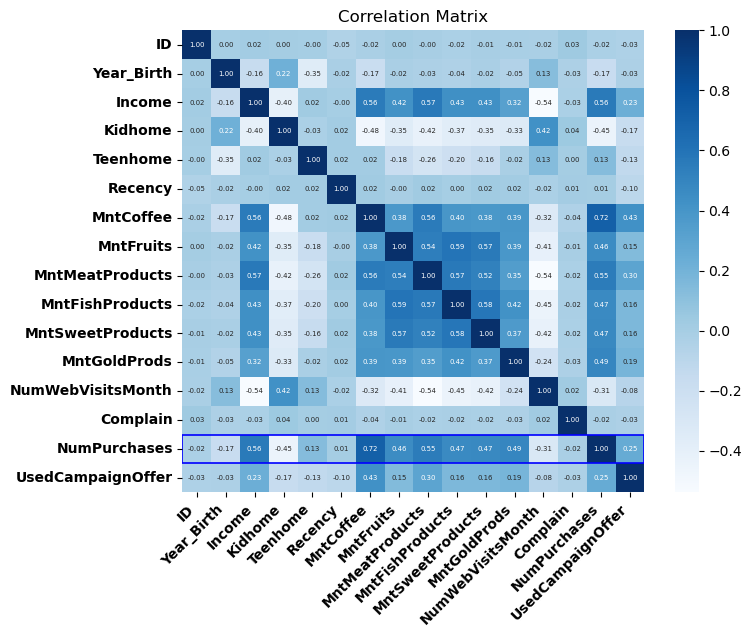

In [8]:
# Correlation of Features
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, annot_kws={"fontsize": 5})
plt.title('Correlation Matrix')
plt.xticks(fontsize=10, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
target_row_index = 14
rectangle = plt.Rectangle((0, target_row_index), correlation_matrix.shape[1], 1, edgecolor='blue', facecolor='none', lw=1.2)
plt.gca().add_patch(rectangle)
plt.show()

In [9]:
# Highest correlation
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

top_features = sorted_correlations.index[:3]
print("Top features with the highest correlation to the target feature:")
for feature in top_features:
    print(f"{feature: <{18}} {correlation_matrix.loc[(target, feature)]:.2f}")

Top features with the highest correlation to the target feature:
MntCoffee          0.72
Income             0.56
MntMeatProducts    0.55


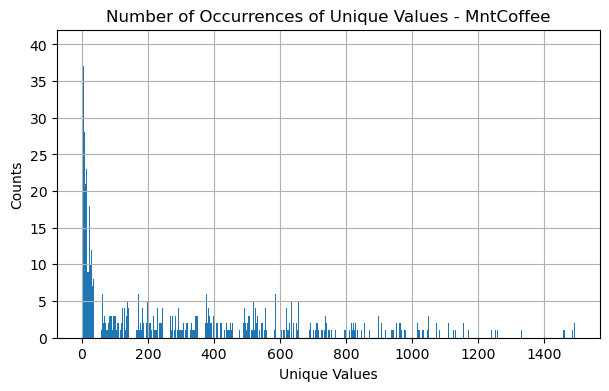

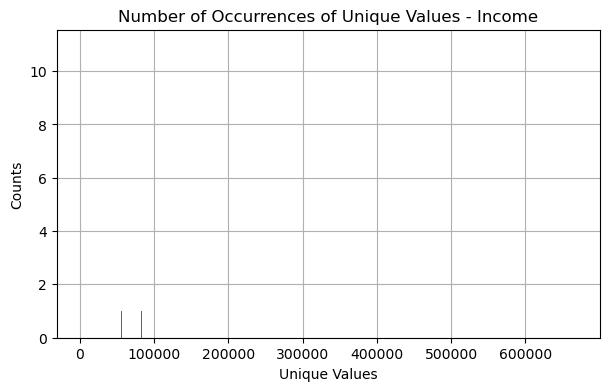

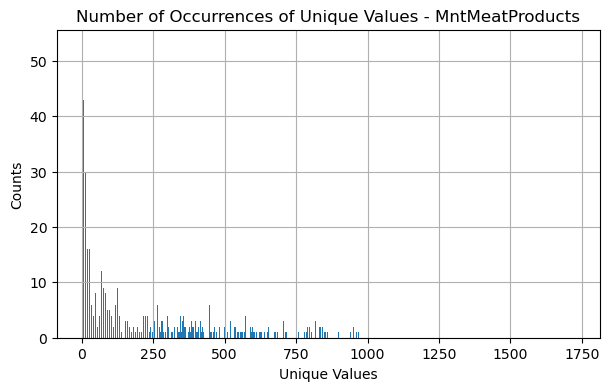

In [10]:
# Plot Number of Occurrences of Unique Values
for feature in top_features:
    plt.figure(figsize=(7, 4))
    unique_values, counts = np.unique(df[feature].to_numpy(), return_counts=True)

    plt.bar(unique_values, counts)

    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.title('Number of Occurrences of Unique Values - {}'.format(feature))
    plt.grid()
    plt.show()


<a name='2-4'></a>
### <a id='toc3_4_'></a>Scatter & Hexbin Plot [](#toc0_)

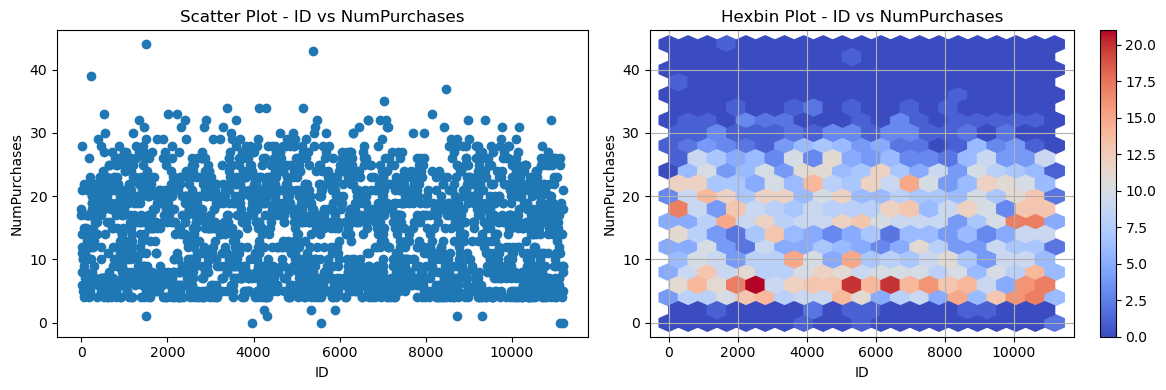

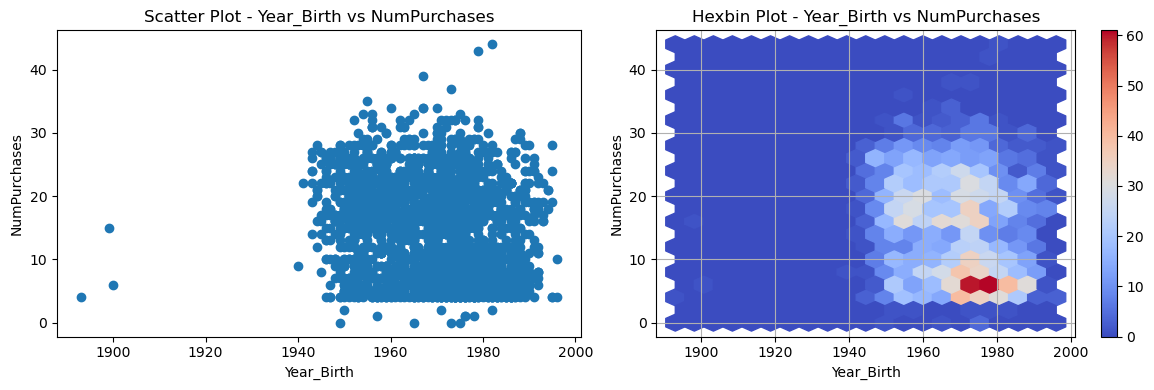

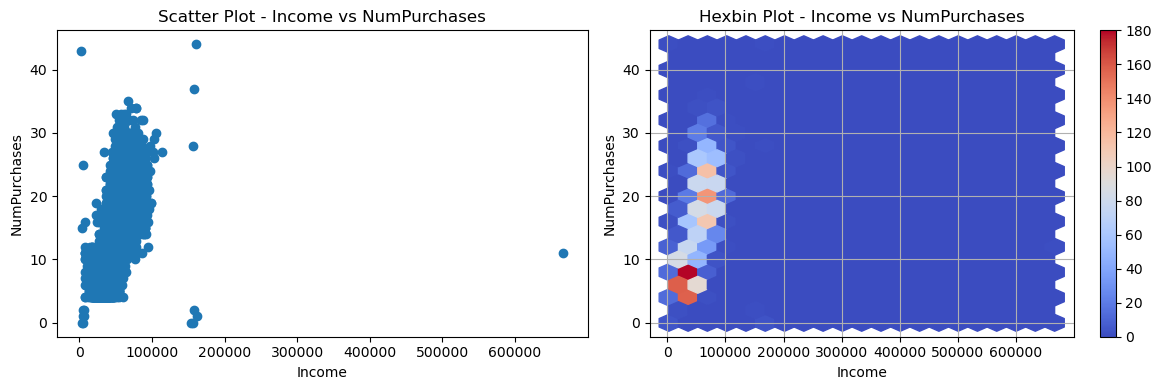

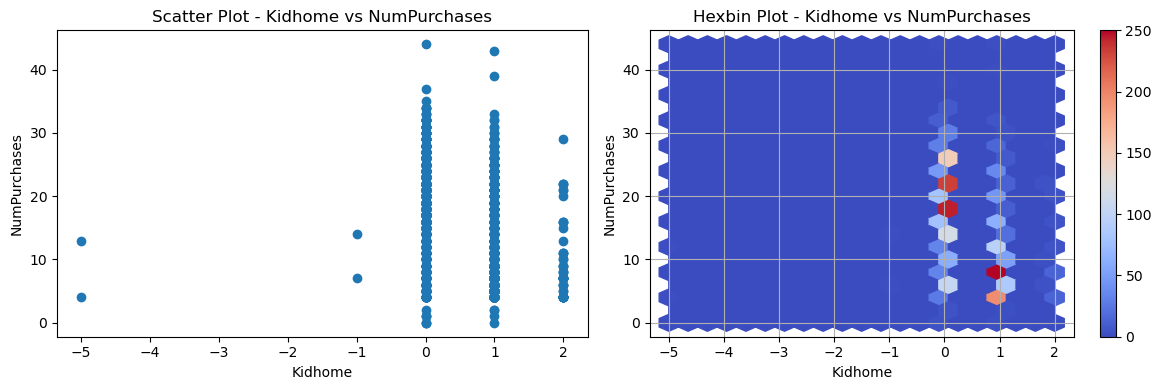

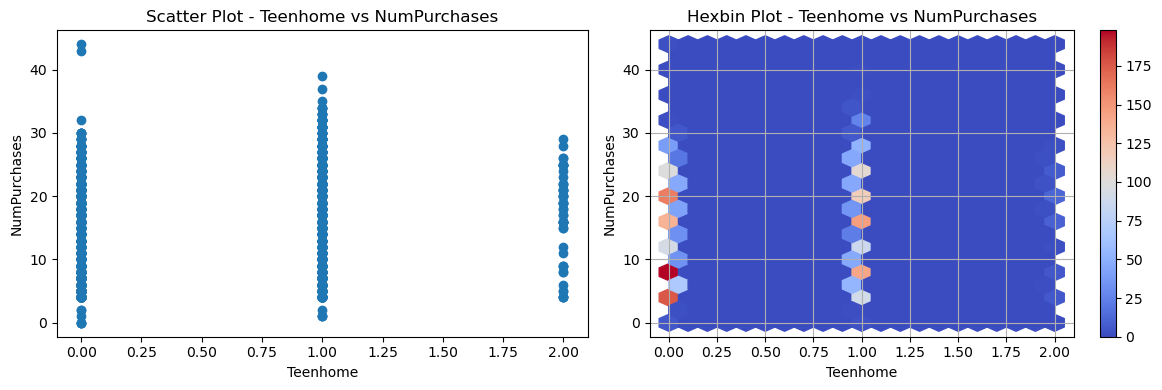

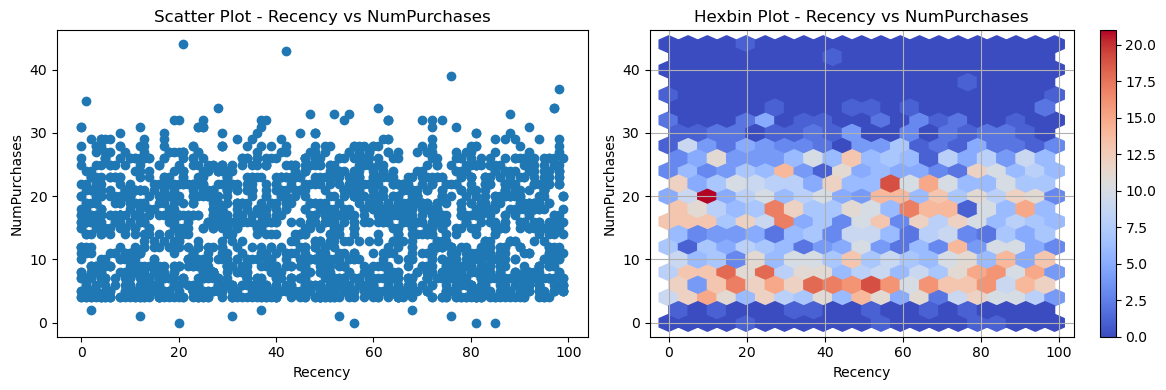

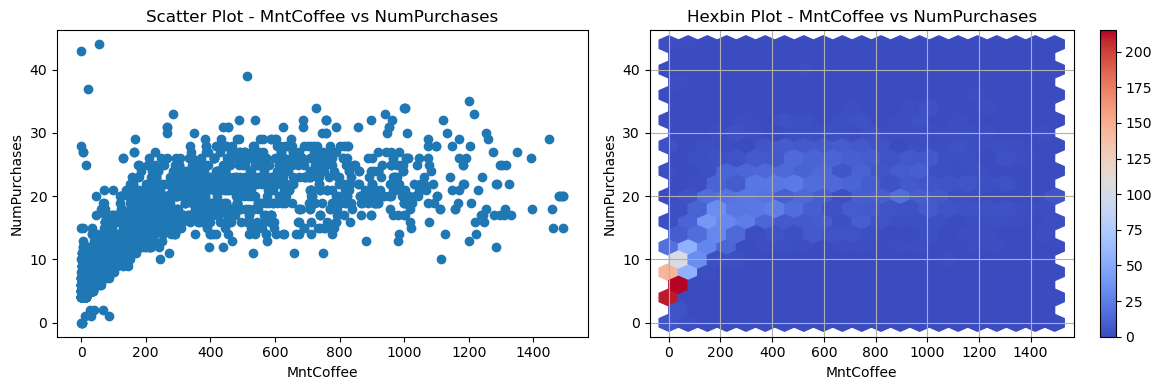

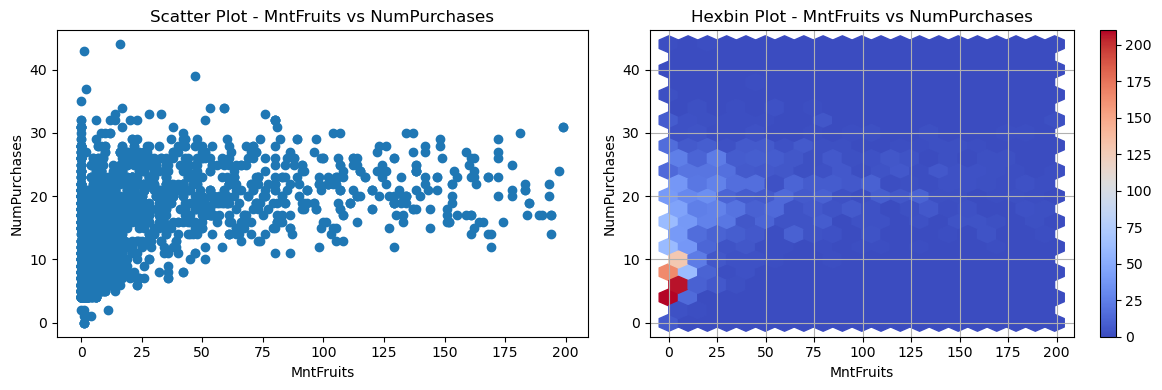

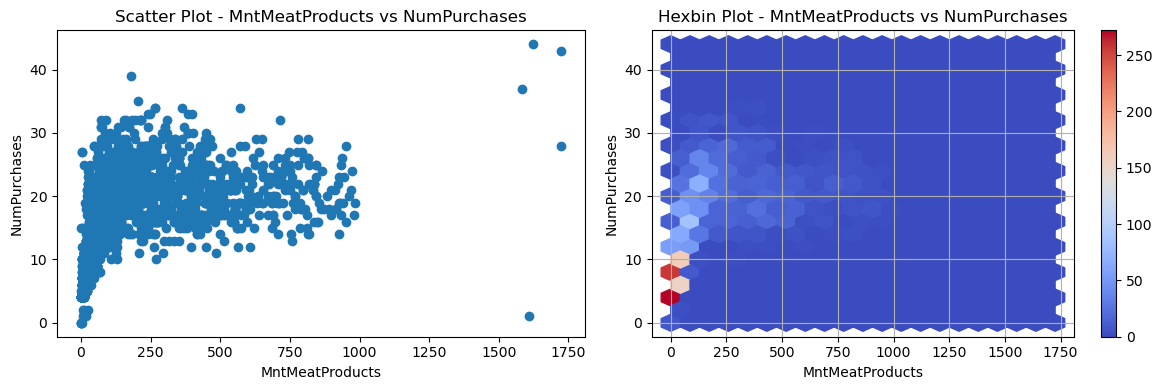

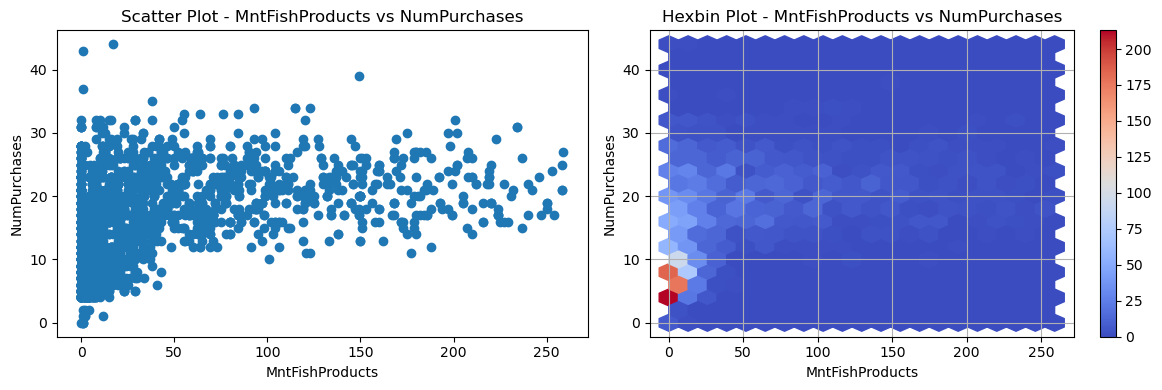

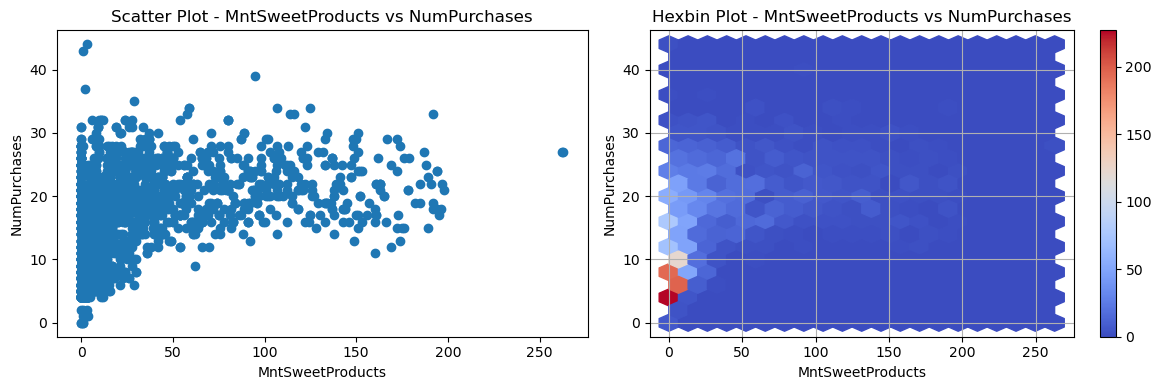

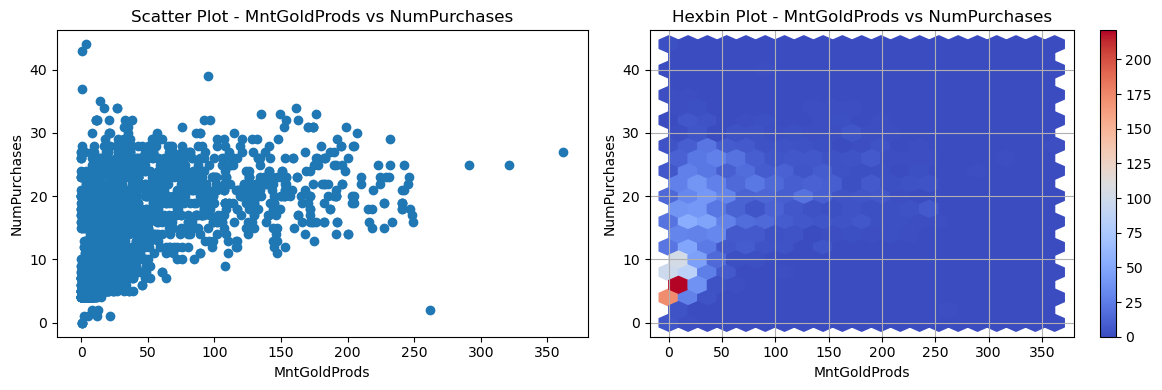

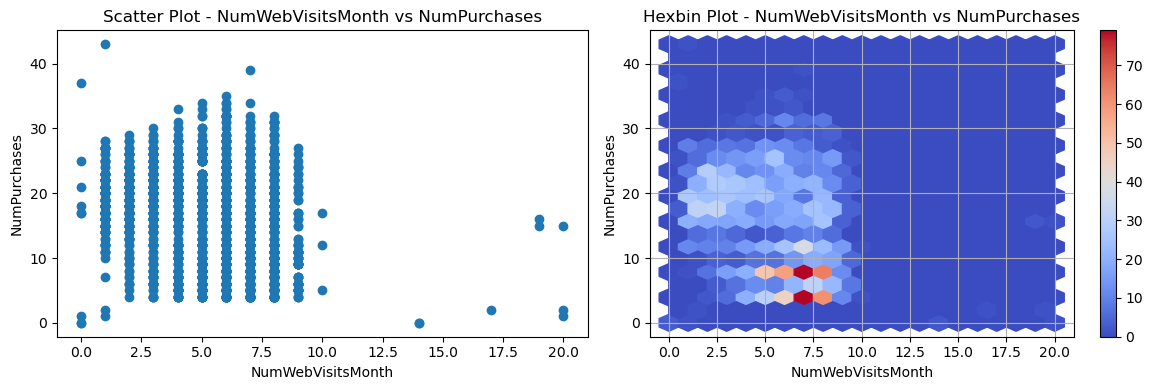

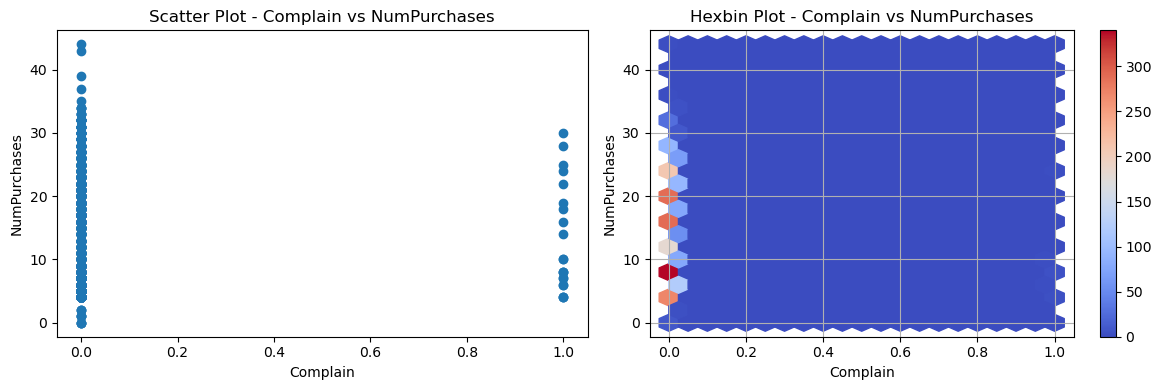

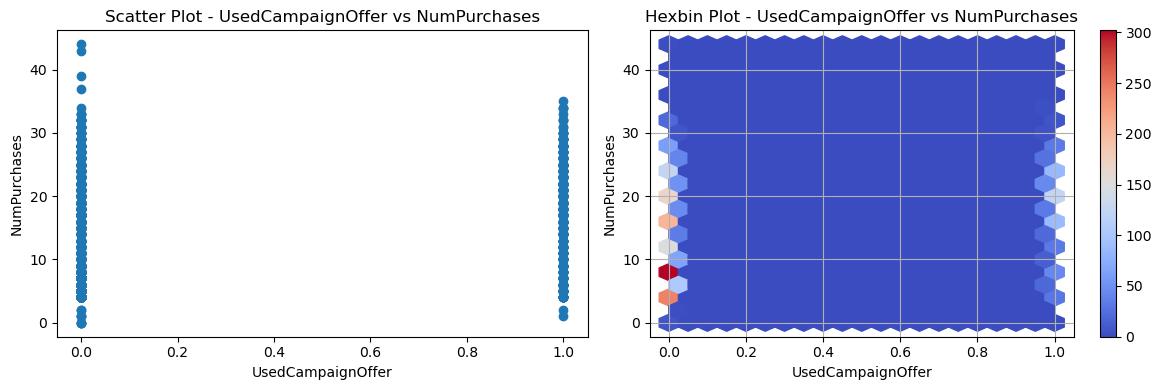

In [11]:
for feature in df.select_dtypes(include='number'):
    if target == feature:
        continue
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].scatter(df[feature], df[target])

    axes[0].set_title('Scatter Plot - {} vs {}'.format(feature, target))
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel(target)

    hb = axes[1].hexbin(df[feature], df[target],  gridsize=20, cmap='coolwarm')
    axes[1].set_title('Hexbin Plot - {} vs {}'.format(feature, target))
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel(target)
    plt.colorbar(mappable=hb)

    plt.tight_layout()
    plt.grid()
    plt.show()

<a name='3'></a>
## <a id='toc4_'></a>Preprocessing the Dataset [](#toc0_)
In this section we try to make the dataset more clean and completed, such as fill missing values and converting the non-numerical values to numerical. 

<a name='3-1'></a>
### <a id='toc4_1_'></a>Missing values [](#toc0_)
Here are some common methods for handling missing values:

1. **Dropping rows or columns:** If the missing values are relatively few and randomly distributed, we can simply remove the rows or columns containing missing values. However, this approach should be used with caution, as it may result in a loss of valuable information if the missing values are not randomly distributed.

2. **Mean, median, or mode imputation:** For numerical features with missing values, we can substitute the missing values with the mean, median, or mode of the available values in that column. This approach assumes that the missing values follow a similar distribution as the observed values.

3. **Forward-fill or backward-fill imputation:** In time-series or sequential data, missing values can be filled using the last observed value (forward-fill) or the next observed value (backward-fill). This technique assumes that the missing values follow a similar pattern to the adjacent values.

4. **Interpolation methods:** Interpolation techniques, such as linear interpolation or spline interpolation, can be used to estimate missing values based on the values of neighboring data points. These methods are useful when there is a clear trend or relationship in the data.

5. **Advanced imputation methods:** Machine learning algorithms, such as k-nearest neighbors (KNN) or regression models, can be used to predict missing values based on other features in the dataset. These methods offer more sophisticated imputation strategies that take into account the relationships between variables.

Here we use method $2$ and replace the missing values with their median.

In [12]:
# FillNa
for feature in df.select_dtypes(include='number').columns:
    df[feature] = df[feature].fillna(df[feature].value_counts().idxmax())

<a name='3-2'></a>
### <a id='toc4_2_'></a>Non-numerical features [](#toc0_)
In our dataset there are $3$ non-numerical features, named, "Education", "Marital_Status", and "Dt_Customer". We apply three diffrent ways for converting them to numerical value.

In general some ways for solving this problem are as follows:

1. **Label Encoding:** Assigning a unique numeric label to each unique category or class in the data.

2. **One-Hot Encoding:** Creating binary columns to represent each category. Each category is encoded as a separate binary feature, with a value of 1 indicating the presence of that category and 0 otherwise. One-hot encoding is suitable for nominal categorical variables where there is no inherent order or hierarchy.(we are going to use it for "Marital_Status")

3. **Ordinal Encoding:** Assigning numerical values to categories based on their order or rank. (we are going to use it for "Education" which obviosly has an order.)

In [13]:
# Ordinal Encoding of Education
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Encoded_Education'] = ordinal_encoder.fit_transform(df[['Education']])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer,Encoded_Education
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,7.0,0,25,1,2.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2.0,1,6,2,1,6.0,5.0,0,6,0,2.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,2.0,49,127,111,21,42.0,7.0,0,21,0,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0,2.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0,2.0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1,4.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1,2.0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,7.0,0,23,0,3.0


In [14]:
# One Hot Encoding of Marital_Status
one_hot_encoded = pd.get_dummies(df[['Marital_Status']])
df = pd.concat([df, one_hot_encoded], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,...,UsedCampaignOffer,Encoded_Education,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,...,1,2.0,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2.0,...,0,2.0,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,2.0,...,0,2.0,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,...,0,2.0,0,0,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,...,0,4.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,...,0,2.0,0,0,0,1,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,...,1,4.0,0,0,0,0,0,1,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,...,1,2.0,0,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,...,0,3.0,0,0,0,0,0,1,0,0


Finally, for the "DT_Customer" feature, which is numerical in nature, we will calculate the time difference between each data point and a fixed reference point in time, such as January 1, 2023. This will allow us to capture the relative duration since the fixed reference point for each data entry in the dataset.

In [15]:
# DT_Customer
for i in range(df.shape[0]):
    date = datetime.strptime(df.loc[(i, 'Dt_Customer')], "%d-%m-%Y")
    curr_date = datetime(2023, 1, 1)
    df.loc[(i, 'Encoded_Dt_Customer')] = (curr_date - date).days
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,...,Encoded_Education,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Encoded_Dt_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,...,2.0,0,0,0,0,1,0,0,0,3771.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2.0,...,2.0,0,0,0,0,1,0,0,0,3221.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,2.0,...,2.0,0,0,0,0,0,1,0,0,3420.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,...,2.0,0,0,0,0,0,1,0,0,3247.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,...,4.0,0,0,0,1,0,0,0,0,3269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,...,2.0,0,0,0,1,0,0,0,0,3489.0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,...,4.0,0,0,0,0,0,1,0,0,3127.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,...,2.0,0,0,1,0,0,0,0,0,3263.0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,...,3.0,0,0,0,0,0,1,0,0,3264.0


<a name='3-3'></a>
### <a id='toc4_3_'></a>Normalizing [](#toc0_)
Normalizing means transforming the features to have zero mean and unit variance. It involves subtracting the mean and dividing by the standard deviation of the feature values.

Normalization is commonly applied to datasets in machine learning because features in a dataset may have different scales or units. Normalization brings these features to a similar scale, ensuring that no single feature dominates the learning process due to its larger magnitude. This is particularly important for algorithms that rely on distance calculations, such as k-nearest neighbors (KNN)

> **Does it nead to normalized our dataset in this project?**
<br>
Normalization is not strictly required for **linear regression**, but it can still be beneficial, for example we do not have to work with large numbers and it will reduce the memory, and maybe time, complexity.
<br>
But in **gradient descent**, normaliziation can be a good choice, because it converge faster when the features are normalized. Normalization prevents the weights or coefficients associated with different features from being updated at vastly different rates, which can slow down the learning process.

In [16]:
#Normalizing
scaler = StandardScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,...,Encoded_Education,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Encoded_Dt_Customer
0,-0.020999,-0.985345,Graduation,Single,0.371910,-0.777134,-0.929894,04-09-2012,0.307039,1.075629,...,-0.458383,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.531185
1,-1.053058,-1.235733,Graduation,Single,-0.053919,0.997361,0.906934,08-03-2014,-0.383664,-0.824018,...,-0.458383,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-1.190545
2,-0.447070,-0.317643,Graduation,Together,0.858433,-0.777134,-0.929894,21-08-2013,-0.798086,-0.824018,...,-0.458383,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.205773
3,0.181716,1.268149,Graduation,Together,-0.765127,0.997361,-0.929894,10-02-2014,-0.798086,-0.797009,...,-0.458383,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.061881
4,-0.082614,1.017761,PhD,Married,0.377507,0.997361,-0.929894,19-01-2014,1.550305,-0.310843,...,1.533425,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.953012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,Graduation,Married,0.483296,-0.777134,0.906934,13-06-2013,-0.107383,1.297705,...,-0.458383,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,0.135680
2236,-0.490200,-1.903435,PhD,Together,0.584067,2.771857,0.906934,10-06-2014,0.237969,0.388395,...,1.533425,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.655713
2237,0.516905,1.017761,Graduation,Divorced,0.330136,-0.777134,-0.929894,25-01-2014,1.446700,1.894909,...,-0.458383,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-0.982703
2238,0.814199,-1.068807,Master,Together,0.772935,-0.777134,0.906934,24-01-2014,-1.419719,0.454418,...,0.537521,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.977755


At the end of our data preprocessing, we will move the target column to the end of the dataset.

In [17]:
# Move target column
column = df.pop(target)
df[target] = column

<a name='3-4'></a>
### <a id='toc4_4_'></a>Train Test Split [](#toc0_)
The percentage of the dataset that should be allocated for testing, often referred to as the test set size, depends on various factors, including the size of the dataset, the complexity of the problem, and the availability of data. There is no fixed rule for determining the exact percentage, but here are some commonly used guidelines:

* **$70/30$ or $80/20$ Split:** A common practice is to allocate around $70$% to $80$% of the data for training and the remaining 30% to 20% for testing. This split provides a sufficient amount of data for training while still allowing for a reasonable evaluation of the model's performance.

* **$60/40$ Split:** In cases where the dataset is relatively small or when there is limited data available, a $60$% training and 40% testing split can be used. This larger test set helps provide a more reliable estimate of the model's performance.

There are several methods available for splitting a dataset into training and testing subsets. Here are some commonly used techniques:

1. **Holdout Method:** The dataset is divided into two mutually exclusive subsets: a training set and a test set.

2. **Stratified Sampling:**  When splitting the data, ensure that the training and test sets have similar class proportions as the original dataset. For example, if one class represents $70$% of the original dataset, aim to have approximately $70$% of that class in both the training and test sets.

3. **Cross-Validation:** Cross-validation is a resampling technique that involves dividing the dataset into multiple subsets or "folds." The model is trained and evaluated multiple times, with each fold serving as the test set while the remaining folds are used for training.

In all of them first we shuffle the dataset and then randomly choose the test and train. 

Let's split the dataset into training and testing sets.

In [18]:
# Split to test an train
X = df.drop(columns=[target]).copy(deep=True)
y = df[[target]].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Just before moving on to the next section, let's recalculate the features that have the highest correlation with the target feature. This is necessary because the dataset has been modified, with some features changed and new features added.

In [19]:
# Higest Corrolation
correlation_matrix = df.corr(numeric_only=True)
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

<a name='4'></a>
## <a id='toc5_'></a>Training, Evaluation, and Regularization [](#toc0_)

<a name='4-1'></a>
### <a id='toc5_1_'></a>Linear Regression [](#toc0_)

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-y_i + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$-\Sigma y_i + \Sigma \hat{\beta} + \hat{\alpha} \Sigma x_i = 0$$
$$\Sigma y_i - \hat{\alpha} \Sigma x_i =  m \hat{\beta}$$
$$\bar{y_i} - \hat{\alpha}  \bar{x_i} = \hat{\beta}$$
$$ \to \beta = \bar{y} - \hat{\alpha} \bar{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$
$$ -\Sigma x_i y_i +  \hat{\beta}\Sigma x_i + \hat{\alpha} \Sigma x_i ^ 2 = 0$$
$$(1) \to -\Sigma x_i y_i +  (\bar{y} - \hat{\alpha} \bar{x})\bar{x_i} + \hat{\alpha} \Sigma x_i ^ 2 = 0$$
$$ \alpha = \frac{\Sigma x_i y_i - \bar{x}\bar{y}}{\Sigma x_i ^ 2 + \bar{x} ^ 2}$$
$$ \to \hat{\alpha} = \frac{\Sigma{(x_i - \bar{x})(y_i - \bar{y})}}{\Sigma{(x_i - \bar{x})^2}}
$$
$$ \hat{\beta} = \bar{y} - \hat{a} \bar{x}$$



Based on the above formula, we implement the function below to compute the parameters of a simple linear regression

In [20]:
def simple_linear_regression(input_feature, output):
    xbar = np.mean(input_feature)
    ybar = np.mean(output)
    alpha = np.sum((input_feature - xbar) * (output - ybar)) / np.sum(np.power(input_feature - xbar, 2))
    beta = ybar - alpha * xbar
    return (alpha, beta)

Now the `get_regression_predictions(...)` function predicts the value of given data based on the calculated intercept and slope

In [21]:
def get_regression_predictions(input_feature, bias, slope):
    return slope * input_feature + bias

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

The following function computes the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [22]:
def get_root_mean_square_error(predicted_values, outputs):
    mean_square = np.mean(np.power(predicted_values - outputs, 2))
    return np.sqrt(mean_square)

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

The following function calculates the R2 score of a given input_feature, output, bias, and slope:

In [127]:
def get_r2_score(predicted_values, outputs):
    sum_square = np.sum(np.power(predicted_values - outputs, 2))
    var_true = outputs.shape[0] * np.var(outputs)
    return (1 - (sum_square / var_true))

Now Let's calculate the fitness of the model:

In [128]:
# Measure the performance of the simple linear regression model
designated_feature_list = sorted_correlations.index[:4]
print(f"{'Feature': <{18}} {'R2': <{4}}  {'rmse'}")
for feature in designated_feature_list:
    alpha, beta = simple_linear_regression(X_train[feature].to_numpy(), y_train.to_numpy().flatten())
    predicted = get_regression_predictions(X_test[feature].to_numpy(), beta, alpha)
    r2_score = get_r2_score(predicted, y_test.to_numpy().flatten())
    rmse = get_root_mean_square_error(predicted, y_test.to_numpy().flatten())
    print(f"{feature: <{18}} {r2_score:.2f}  {rmse:.2f}")

Feature            R2    rmse


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### <a id='toc5_1_1_'></a>Results [](#toc0_)
* The order of features is based on their higher correlation with the target feature. As we expected, as the correlation **decreases**, the R2 score also **decreases**. This indicates that features with higher correlation tend to have a stronger influence on the target variable, resulting in higher predictive power
* Linear regression is a simple model that may not fully capture the complex relationships between features. Therefore, the R2 score, which measures the goodness of fit for the model, may not be very high. Linear regression is limited in its ability to understand intricate and **nonlinear relationships** among features

### <a id='toc5_2_'></a>Multiple Regression [](#toc0_)

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + \dots + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{i1} + \hat \beta_{2} x_{i2} + \hat \beta_{i3} x_{3} + \hat \beta_{4} x_{i4} + \dots + \hat \beta_{n} x_{in}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + \dots + \hat \beta_{n} x_{jn})) x_{ji} $$



#### <a id='toc5_2_1_'></a>Predicting Output Given Regression Weights [](#toc0_)

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method,  `predict_output` function computes the predictions for an entire matrix of features given the matrix, bias, and the weights:

In [25]:
def predict_output(feature_matrix, weights, bias):
    return np.dot(feature_matrix, weights) + bias

#### <a id='toc5_2_2_'></a>Computing the Derivative [](#toc0_)

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  )) *(-1) * [feature_i]
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$-2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [26]:
def feature_derivative(errors, feature):
    return 2 * np.dot(feature.T, errors) / errors.shape[0]

#### <a id='toc5_2_3_'></a>Gradient Descent [](#toc0_)

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the step size. We stop when we are "sufficiently close" to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed tolerance.


With this in mind, we will write the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [27]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, initial_bias, step_size, tolerance):
    weights = initial_weights
    bias = initial_bias
    gradient_length = np.inf
    while gradient_length > tolerance:
        predicted_values= predict_output(feature_matrix, weights, bias)
        errors = outputs - predicted_values
        derivative = feature_derivative(errors, feature_matrix)
        bias += step_size * 2 * np.sum(errors)
        weights += step_size * derivative
        gradient_length = np.linalg.norm(derivative)
    return weights, bias


In [28]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame.loc[:, feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features, train_x, train_y):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10, # 1.e-10
        'bias': 0
    }

    chosen_feature_dataframe = train_x.loc[:,chosen_features]

    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = train_y
    target_matrix = target_column.to_numpy().flatten()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

In [29]:
def train_and_test(chosen_features, X_train, X_test, y_train, y_test):

    chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features, X_train, y_train)
    normalized_X_test = normalize_features(chosen_features, X_test.copy(deep=True))

    predicted_values_test = predict_output(normalized_X_test[chosen_features].to_numpy(), train_weights, bias)
    predicted_values_train = predict_output(chosen_feature_matrix, train_weights, bias)

    real_values_test = y_test.to_numpy().flatten()
    real_values_train = y_train.to_numpy().flatten()

    r2_score_test = get_r2_score(predicted_values_test, real_values_test)
    rsme_test = get_root_mean_square_error(predicted_values_test, real_values_test)

    r2_score_train = get_r2_score(predicted_values_train, real_values_train)
    rsme_train = get_root_mean_square_error(predicted_values_train, real_values_train)

    values = [[r2_score_test, rsme_test],[r2_score_train, rsme_train]]
    df = pd.DataFrame(values, index=['Test', 'Train'], columns=['r2_score', 'RSME'])

    return df

### <a id='toc5_3_'></a>Two Feature Regression [](#toc0_)

In this part, we choose 2 features and implement multiple regression on them :

In [30]:
# compute the chosen_feature_matrix, train_weights, and bias
chosen_features = sorted_correlations.index[:2]
score_datafram = train_and_test(chosen_features, X_train, X_test, y_train, y_test)
score_datafram

,r2_score,RSME
Test,0.487512,0.702584
Train,0.495737,0.713374


### <a id='toc5_4_'></a>Three Feature Regression [](#toc0_)

Now repeat the steps for 3 features

In [31]:
chosen_features = sorted_correlations.index[:3]
scores_datafram = train_and_test(chosen_features, X_train, X_test, y_train, y_test)
scores_datafram


,r2_score,RSME
Test,0.559653,0.65126
Train,0.543997,0.67838


### <a id='toc5_5_'></a>Five Feature Regression [](#toc0_)

Finally, repeat the steps for 5 features

In [32]:
chosen_features = sorted_correlations.index[:5]
scores_datafram = train_and_test(chosen_features, X_train, X_test, y_train, y_test)
scores_datafram

,r2_score,RSME
Test,0.582661,0.634017
Train,0.572683,0.656696


### <a id='toc5_6_'></a>Results [](#toc0_)
* The accuracy of multiple regression is superior to that of linear regression, as expected. This improvement stems from the utilization of a greater number of features for prediction, enabling us to perceive our samples in a more comprehensive and refined manner
* As the number of features increases, the model's accuracy will also rise. This phenomenon is attributed to the same reasons mentioned in the previous result.

**NOTE:** We also conducted tests on the training dataset to ascertain whether overfitting occurred. As evident, we did not encounter overfitting in any of the cases.

<a name='4-3'></a>
### <a id='toc5_7_'></a>Classification [](#toc0_)

In this part we change the target column to a binary feature by using a threshold and mark that as 'HIGH' and 'LOW'.

In [33]:
# Classification Column
classif_target = 'PurchaseRate'

df[classif_target] = df[target] > df[target].median()
df[classif_target] = df[classif_target].map({True: 'HIGH', False: 'LOW'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Encoded_Dt_Customer,NumPurchases,PurchaseRate
0,-0.020999,-0.985345,Graduation,Single,0.371910,-0.777134,-0.929894,04-09-2012,0.307039,1.075629,...,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.531185,1.320826,HIGH
1,-1.053058,-1.235733,Graduation,Single,-0.053919,0.997361,0.906934,08-03-2014,-0.383664,-0.824018,...,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-1.190545,-1.154596,LOW
2,-0.447070,-0.317643,Graduation,Together,0.858433,-0.777134,-0.929894,21-08-2013,-0.798086,-0.824018,...,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.205773,0.799685,HIGH
3,0.181716,1.268149,Graduation,Together,-0.765127,0.997361,-0.929894,10-02-2014,-0.798086,-0.797009,...,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.061881,-0.894025,LOW
4,-0.082614,1.017761,PhD,Married,0.377507,0.997361,-0.929894,19-01-2014,1.550305,-0.310843,...,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.953012,0.539114,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,Graduation,Married,0.483296,-0.777134,0.906934,13-06-2013,-0.107383,1.297705,...,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,0.135680,0.408829,HIGH
2236,-0.490200,-1.903435,PhD,Together,0.584067,2.771857,0.906934,10-06-2014,0.237969,0.388395,...,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.655713,0.929970,HIGH
2237,0.516905,1.017761,Graduation,Divorced,0.330136,-0.777134,-0.929894,25-01-2014,1.446700,1.894909,...,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-0.982703,0.539114,HIGH
2238,0.814199,-1.068807,Master,Together,0.772935,-0.777134,0.906934,24-01-2014,-1.419719,0.454418,...,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.977755,1.060255,HIGH


Let's split the dataset to Train and Test:

In [34]:
X = df.drop(columns=[target, classif_target]).copy(deep=True)
y = df[[classif_target]].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X.select_dtypes(include='number').to_numpy(), y.to_numpy().flatten(), test_size=0.2)

In [35]:
def plt_confusion_matrix(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred, )
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()

    labels = np.unique(y_true)
    label_num = len(labels)

    label_pos = np.arange(label_num)
    plt.xticks(label_pos, labels)
    plt.yticks(label_pos, labels)

    thresh = cm.max() / 2.

    for i in range(label_num):
        for j in range(label_num):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

def test_model(model, X_train, X_test, y_train, y_test):
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)


    values = [[accuracy_test],[accuracy_train]]
    df = pd.DataFrame(values, index=['Test', 'Train'], columns=['accuracy_score'])
    return df, y_pred_test


<a name='4-3-1'></a>
#### <a id='toc5_7_1_'></a>Decision Tree [](#toc0_)

In [36]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
accuracy, y_pred = test_model(best_model, X_train, X_test, y_train, y_test)
accuracy

,accuracy_score
Test,0.910714
Train,0.926339


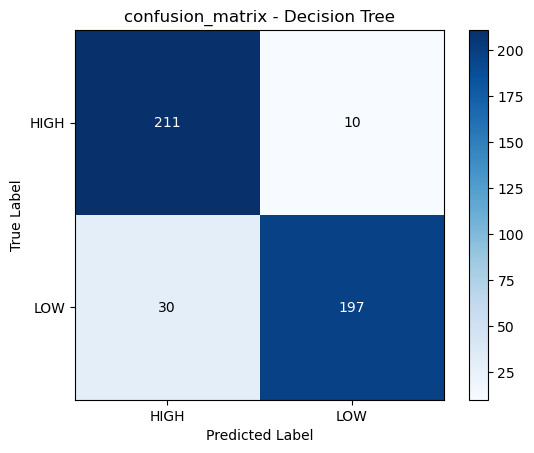

In [37]:
plt_confusion_matrix(y_test, y_pred)
plt.title('confusion_matrix - Decision Tree')
plt.show()

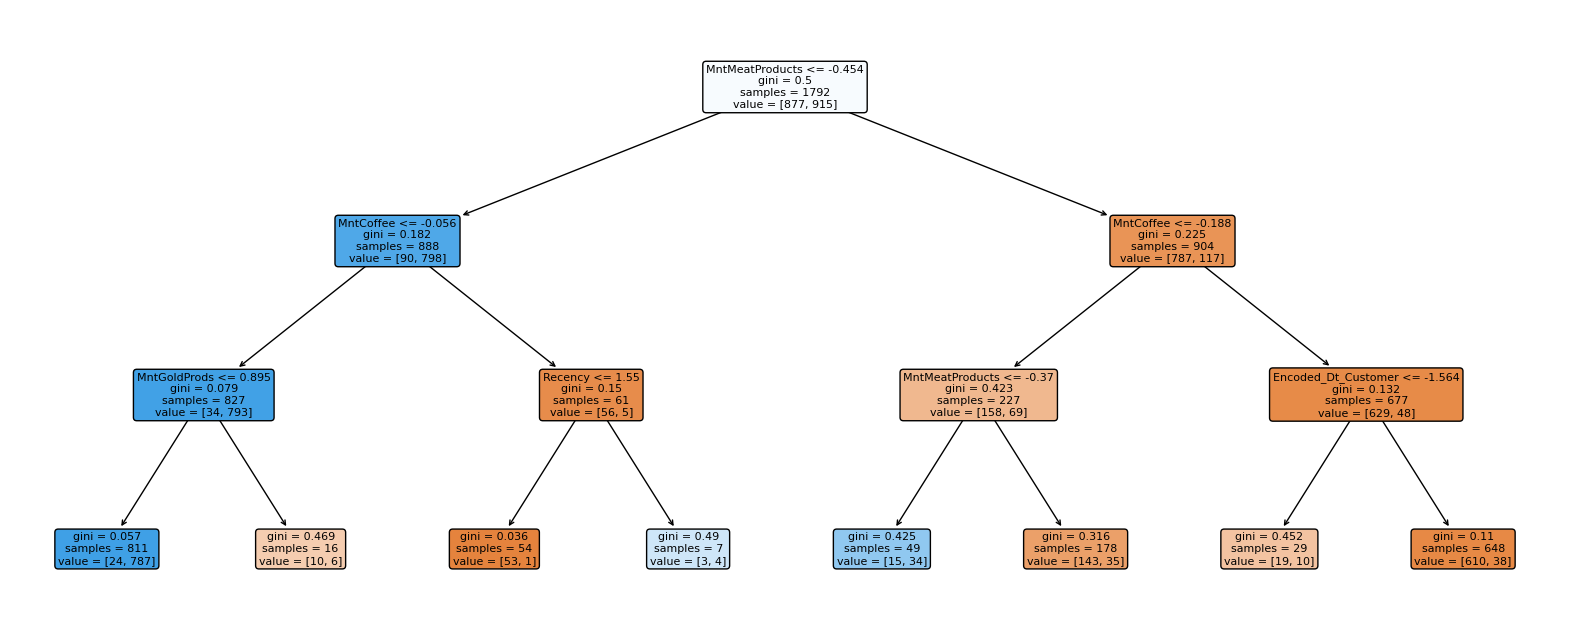

In [38]:
# Plot the decision tree
plt.figure(figsize=(20, 8))
plot_tree(best_model, filled=True, feature_names=list(X.select_dtypes(include='number').columns), rounded=True)
plt.show()

<a name='4-3-2'></a>
#### <a id='toc5_7_2_'></a>K-Nearest-Neighbours [](#toc0_)

In [39]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)
accuracy, y_pred = test_model(best_model, X_train, X_test, y_train, y_test)
accuracy

,accuracy_score
Test,0.879464
Train,1.000000


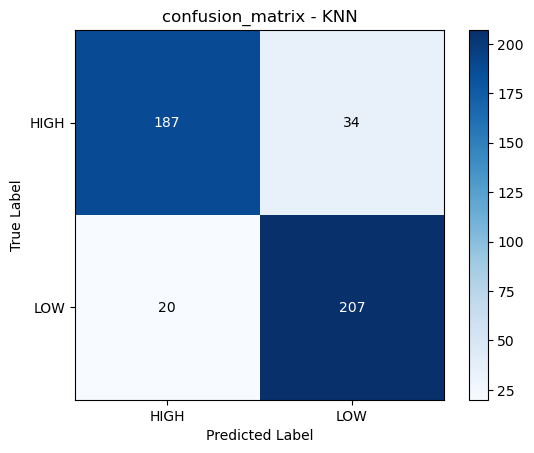

In [40]:
plt_confusion_matrix(y_test, y_pred)
plt.title('confusion_matrix - KNN')
plt.show()

<a name='4-3-3'></a>
#### <a id='toc5_7_3_'></a>Logistic Regression [](#toc0_)

In [41]:
model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [4000]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)
accuracy, y_pred = test_model(best_model, X_train, X_test, y_train, y_test)
accuracy

,accuracy_score
Test,0.872768
Train,0.906808


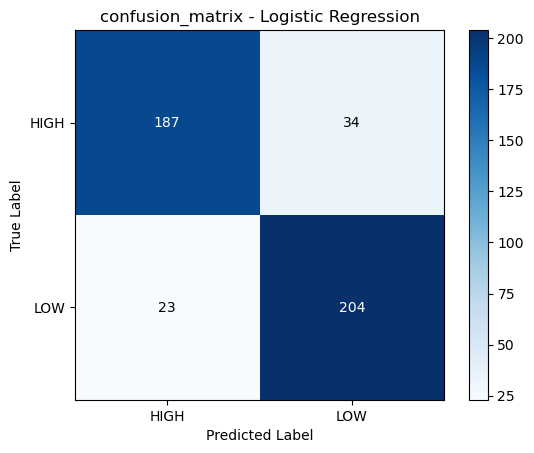

In [42]:
plt_confusion_matrix(y_test, y_pred)
plt.title('confusion_matrix - Logistic Regression')
plt.show()

<a name='4-3-4'></a>
#### <a id='toc5_7_4_'></a>Random Forest [](#toc0_)

**parameters**:
* **n_estimatorsint**: The number of trees in the forest.
* **max_depthint**: The maximum depth of the tree.

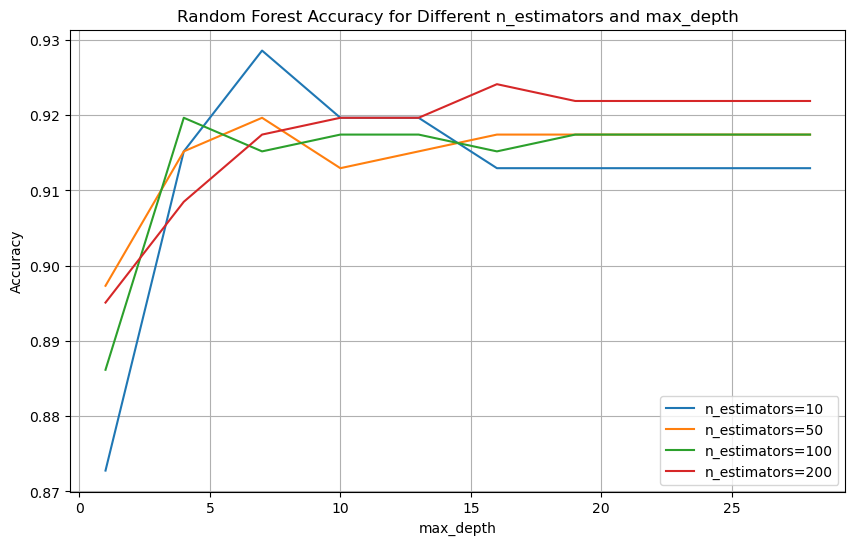

In [43]:
n_estimators_range = [10, 50, 100, 200]
max_depth_range = list(range(1, 30, 3))

results_df = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy'])

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        
        accuracy = rf_model.score(X_test, y_test)
        new_row = pd.DataFrame({'n_estimators': [n_estimators], 'max_depth': [max_depth], 'accuracy': [accuracy]})

        results_df = pd.concat([results_df, new_row], ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 6))

for n_estimators in n_estimators_range:
    subset = results_df[results_df['n_estimators'] == n_estimators]
    ax.plot(subset['max_depth'], subset['accuracy'], label=f'n_estimators={n_estimators}')

ax.set_title('Random Forest Accuracy for Different n_estimators and max_depth')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid()
plt.show()


> **comparing Random Forest and Decision Trees in terms of bias and variance:**
<br>
As the Random Forest doesn't see all the data in each tree, it tends to have lower variance than a decision tree. However, since it doesn't see all the data, it has a higher bias, although not significantly more than a decision tree when we increase the number of estimators sufficiently.

<a name='4-4'></a>
### <a id='toc5_8_'></a>Differential Privacy [](#toc0_)

Differential privacy (DP) is an approach for providing privacy while sharing information about a group of individuals, by describing the patterns within the group while withholding information about specific individuals.This is done by making arbitrary small changes to individual data. Thus the data cannot be used to infer much about any individual.

> **What is the diffrence between Gaussian noise and Laplace noise?**
<br>
The difference between Gaussian noise and Laplace noise lies in their probability distribution functions. Gaussian noise is characterized by a bell-shaped curve and smooth distribution, while Laplace noise has a double-exponential curve with heavier tails, making it more robust in the presence of outliers

Now let's try diffrent variance for gaussian noise and calculate the accuracy for random forest:

In [ ]:
max_var = 30
accuracy = np.zeros(max_var)
for var in range(1, max_var + 1):
    noise = np.random.normal(0, var, df.select_dtypes(include='number').shape)
    noisy_df = df.select_dtypes(include='number') + noise
    noisy_df[classif_target] = df[classif_target]

    # Split to test an train
    X = noisy_df.drop(columns=[classif_target]).copy(deep=True)
    y = df[classif_target].copy(deep=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    random_forest =  RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    random_forest.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

    y_pred = random_forest.predict(X_test)
    accuracy[var - 1] = accuracy_score(y_test, y_pred)

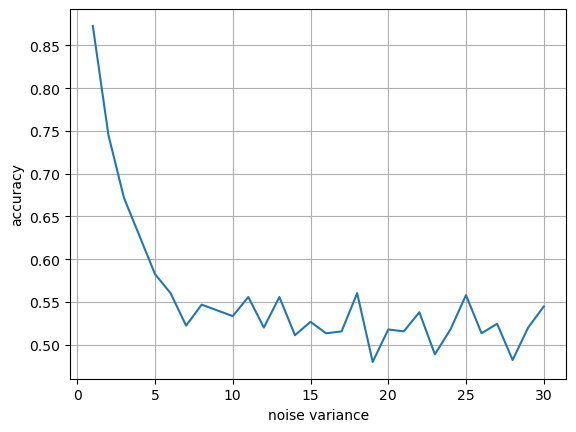

In [87]:
plt.plot(range(1, max_var + 1), accuracy)
plt.xlabel('noise variance')
plt.ylabel('accuracy')
plt.grid()

### <a id='toc5_9_'></a>Result: [](#toc0_)
* As you can observe, the model's accuracy decreases due to a slightly higher variance in the noise. In fact, an increase in the variance of the noise leads to a corresponding decrease in accuracy.

<a name='4-5'></a>
### <a id='toc5_10_'></a>Optional: Gradient-Boosting [](#toc0_)

Gradient boosting is a machine learning technique based on boosting in a functional space, where the target is pseudo-residuals rather than the typical residuals used in traditional boosting. It gives a prediction model in the form of an ensemble of weak prediction models, i.e., models that make very few assumptions about the data, which are typically simple decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

Algorithm:
Input: training set $\{(x_i, y_i)\}_{i = 1}^{n}$, a differentiable loss function $L(y, F(x))$, a numberr of iterations $M$.

1. Initize model with a constant value:
$$
F_0(x) = argmin_{\gamma} \sum_{i = 1}^{n} L(y_i, \gamma)
$$
2. For $m = 0$ to $M$:
    1. Compute so-called pseudo-residuals:
    $$
        r_{im} = - \left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m - 1}(x)} \qquad \text{for} \space i = 1, \dots, n
    $$
    2. Fit a base learner(or week learner, e.g. tree) closed under scaling $h_m(x)$  to psedudo-residuals.
    3. Compute multiplier $\gamma_m$ by solving the folling one-dimensional optimization problem:
    $$
    \gamma_m = argmin_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m - 1}(x_i) + \gamma h_m(x_i)).
    $$
    4. Update the model:
    $$
        F_m(x) = F_{m - 1}(x) + \gamma_m h_m(x).
    $$
3. Output $F_M(x).$

In the algorithm above, we need to find a way to perform part $2.2$, which involves finding a weak learner that fits best the function $h_m(x)$. XGBoost suggests an effective approach for this. After conducting calculations and optimizing the loss function (which is beyond the scope of this project), we arrive at the following equation:
$$
\text{Similarity Score} = \frac{\text{Sum of Residuals, Squared}}{\text{Number of Residuals} + \lambda}
$$
It states that among all possible trees, we should choose the one that has the highest similarity score.

In [113]:
# Split to test an train
X = df.drop(columns=[target]).copy(deep=True)
y = df[[classif_target]].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X.select_dtypes(include='number').to_numpy(), y.to_numpy().flatten(), test_size=0.2)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [114]:
model = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 20, 50],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = xgb.XGBClassifier(**best_params, num_class=2)
model.fit(X_train, y_train)
df, _ = test_model(model, X_train, X_test, y_train, y_test)
df

,accuracy_score
Test,0.944196
Train,1.000000


We can observe a significant difference in accuracy between XGBoost and other classification methods.

<a name='6'></a>
## <a id='toc6_'></a>Refrences [](#toc0_)

* [XGBoost](https://en.wikipedia.org/wiki/XGBoost)
* [XGBoost: Mathematical Details](https://www.youtube.com/watch?v=ZVFeW798-2I&t=1454s)
